Multivariate AD detection

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from pyod.models import cblof

df = pd.read_excel("Superstore.xls")

Graph the independent trends of the data

<AxesSubplot:ylabel='Sales'>

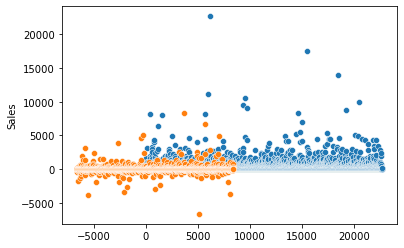

In [50]:
# plt.scatter("Sales", "Profit", df)
sns.scatterplot(x = np.linspace(df['Sales'].min(),df['Sales'].max(), len(df['Sales'])), y = df['Sales'])
sns.scatterplot(x = np.linspace(df['Profit'].min(),df['Profit'].max(), len(df['Profit'])), y = df['Profit'])

Let's see their correlation. We expect positive correlation since larger profit usually comes from larger number of sales.

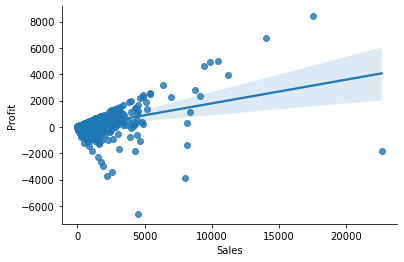

In [51]:
sns.regplot(x = df['Sales'], y = df['Profit'])
sns.despine()

In [59]:
outliers_probability = 0.01
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

clf = cblof.CBLOF(contamination=outliers_probability,check_estimator=False, random_state=0)
X1 = df['Sales'] # [x1,x2,x3,x4,...]
X2 = df['Profit'] # [y1,y2,y3,y4,...]
X=[]
for i in range(len(df['Sales'])):
    X += [[X1[i],X2[i]]]
# Y=[[1,2],[1,3],[1,3],[113,13],[1,2],[1,3],[1,3],[113,13]]
clf.fit(X)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=None, random_state=0,
   use_weights=False)

Now, let's find the outliers

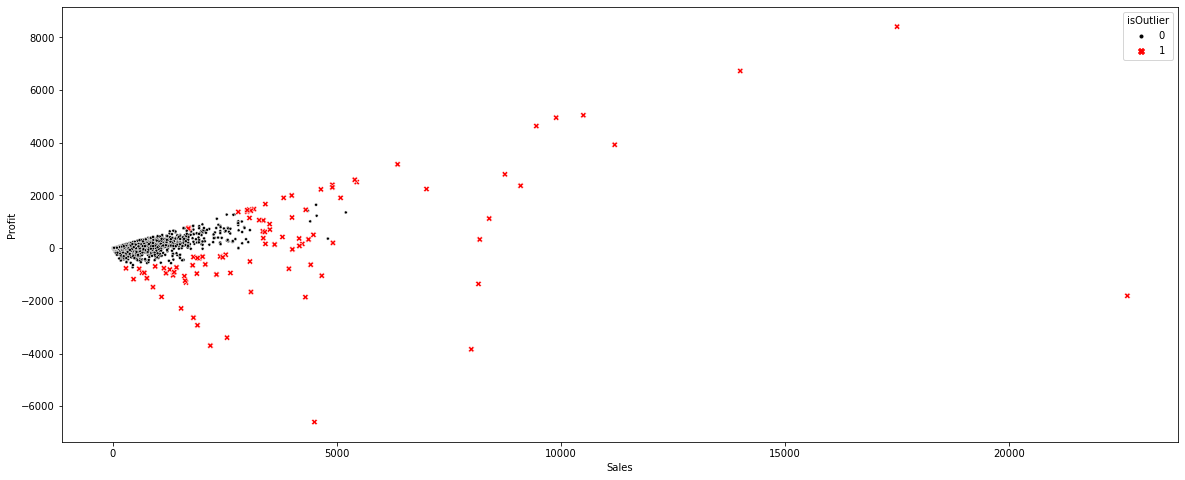

In [97]:
outliers = clf.predict(X)
outlier_factor = clf.decision_function(X)
# plt.scatter(x = outliers, y = outlier_factor)
colors=[]
# print(outlier_factor)
for val in outlier_factor:
    colors += [(0, 0, int(255*(val/outlier_factor.max())))]
colors=[(0,0,0)]
mixed = df
mixed['Outlier'] = outlier_factor
mixed['isOutlier'] = outliers
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'Sales', y = 'Profit', data = mixed, hue = 'isOutlier', palette={0:'black', 1:'red'} , style = "isOutlier", markers = {0:'.',1:'X'})
plt.show()